### Description of an experiment

**Goal**: Quantify the impact of the flanking sequences in createing TAD-boundary

**Input**: 20 weak and 20 pair of CTCF motifs (defined by the threshold of genomic_SCD) are inserted into 10 different background sequences (those sequences were constructed in such a way that the model predicts maximally flat map - a map with no genomic structures, i.e. no TAD-boundaries)

**What changes in the experiment?** the length of flank that is inserted around CTCF motif (but the length of left flank is equal to the length of right flank)

**What is measured the experiment?** SCD and INS-16. Intuitively, the higher SCD / lower INS-16, the bigger boundary-creating potential

**Variants**: the CTCFs were inserted in two orientations: ">>" and "<<"


In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils

2022-09-30 16:08:31.872283: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /spack/apps/linux-centos7-x86_64/gcc-8.3.0/python-3.9.2-uvcroioc4witkp6qf7mbebof5ix4wlb6/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/pmix-3.1.3-3sm6emyqaxapunh7rwbjvtaqoqe2e5z3/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/openmpi-4.0.2-ipm3dnvlbtxawpi4ifz7jma6jgr7mexq/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/openblas-0.3.8-2no6mfziiclwxb7lstxoos335gnhjpes/lib:/spack/apps/gcc/8.3.0/lib64::/home1/smaruj/software/GSL/lib:/home1/smaruj/software/HTSLIB/lib
2022-09-30 16:08:31.872320: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# small_right_scd -> orientation ">>" tested
# small_left_scd -> orientation "<<" tested

In [3]:
filename = "/home1/smaruj/akita_utils/bin/insert_virtual_flanks_experiment/small_right_scd/scd.h5"
# filename = "/home1/smaruj/akita_utils/bin/insert_virtual_flanks_experiment/small_left_scd/scd.h5"
scd_stats = ["SCD", "INS-16"]

In [4]:
df = akita_utils.h5_to_df(filename, scd_stats, drop_duplicates_key=None)

In [5]:
is_strong = lambda x : True if (x > 20) else False
df["strong"] = df["genomic_SCD"].apply(is_strong)

In [6]:
df["SCD_average"] = (df["SCD_h1_m1_t0"] + df["SCD_h1_m1_t1"] + df["SCD_h1_m1_t2"] + df["SCD_h1_m1_t3"] + df["SCD_h1_m1_t4"] + df["SCD_h1_m1_t5"]) / 6
df["INS-16_average"] = (df["INS-16_h1_m1_t0"] + df["INS-16_h1_m1_t1"] + df["INS-16_h1_m1_t2"] + df["INS-16_h1_m1_t3"] + df["INS-16_h1_m1_t4"] + df["INS-16_h1_m1_t5"]) / 6

In [7]:
#df

In [8]:
df.columns

Index(['INS-16_h1_m1_t0', 'INS-16_h1_m1_t1', 'INS-16_h1_m1_t2',
       'INS-16_h1_m1_t3', 'INS-16_h1_m1_t4', 'INS-16_h1_m1_t5', 'SCD_h1_m1_t0',
       'SCD_h1_m1_t1', 'SCD_h1_m1_t2', 'SCD_h1_m1_t3', 'SCD_h1_m1_t4',
       'SCD_h1_m1_t5', 'background_index', 'chrom', 'end', 'experiment_id',
       'flank_bp', 'genomic_SCD', 'orientation', 'spacer_bp', 'start',
       'strand', 'strong', 'SCD_average', 'INS-16_average'],
      dtype='object')

### SCD

In [9]:
SCD_strong = df[df["strong"] == True]
SCD_weak = df[df["strong"] == False]

In [10]:
SCD_strong.groupby("background_index")["SCD_average"].mean()

background_index
0     58.06250
1     64.81250
2     52.53125
3     82.12500
4     71.18750
5    104.50000
6     72.31250
7    111.37500
8     80.12500
9     80.62500
Name: SCD_average, dtype: float16

In [11]:
SCD_weak.groupby("background_index")["SCD_average"].mean()

background_index
0    37.93750
1    39.00000
2    39.00000
3    49.28125
4    43.09375
5    74.31250
6    44.43750
7    68.37500
8    46.31250
9    50.40625
Name: SCD_average, dtype: float16

### Comment:
It seems that 5th and 7th background sequences give higher values than others.
We can choose e.g. 3 background sequences (maybe just first 3) and conduct furture experiments only on them

In [12]:
import matplotlib.pyplot as plt

In [13]:
SCD_strong_fl = []
SCD_weak_fl = []

for l in range(30):
    SCD_strong_fl.append(df[(df.strong == True) & (df.flank_bp == l)]["SCD_average"].mean())
    SCD_weak_fl.append(df[(df.strong == False) & (df.flank_bp == l)]["SCD_average"].mean())

In [14]:
colors_2 = ["#3B0FE8", "#E80F49"]

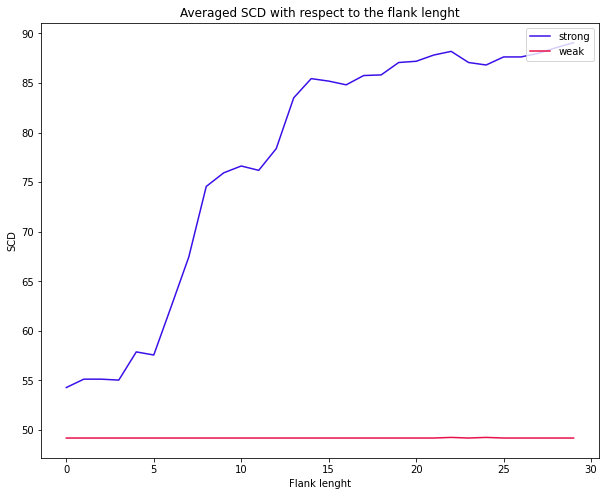

In [15]:
plt.figure(figsize=(10,8))
x = [x for x in range(30)]
plt.plot(x, SCD_strong_fl, label="strong", c=colors_2[0])
plt.plot(x, SCD_weak_fl, label="weak", c=colors_2[1])
plt.title("Averaged SCD with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("SCD")
plt.legend(loc="upper right")

### Comment:
Tendency is the same, but SCD values generally higher that I got last time. 

In [16]:
strong_colors_10 = ["#3B0FE8", "#5736DC", "#441CE5", "#3411C1", "#7A5DEC", "#6648DF", "#3919B7", "#3108D4", "#1F0EB5", "#4E41BD"]
weak_colors_10 = ["#E80F49", "#E92459", "#D01B4B", "#C61342", "#C94366", "#DB2555", "#E40842", "#CE0E41", "#E94772", "#F07293"]

In [17]:
SCD_strong_fl_bg = [[] for i in range(10)]
SCD_weak_fl_bg = [[] for i in range(10)]

for l in range(30):
    for b in range(10):
        SCD_strong_fl_bg[b].append(df[(df.strong == True) & (df.flank_bp == l) & (df.background_index == b)]["SCD_average"].mean())
        SCD_weak_fl_bg[b].append(df[(df.strong == False) & (df.flank_bp == l) & (df.background_index == b)]["SCD_average"].mean())

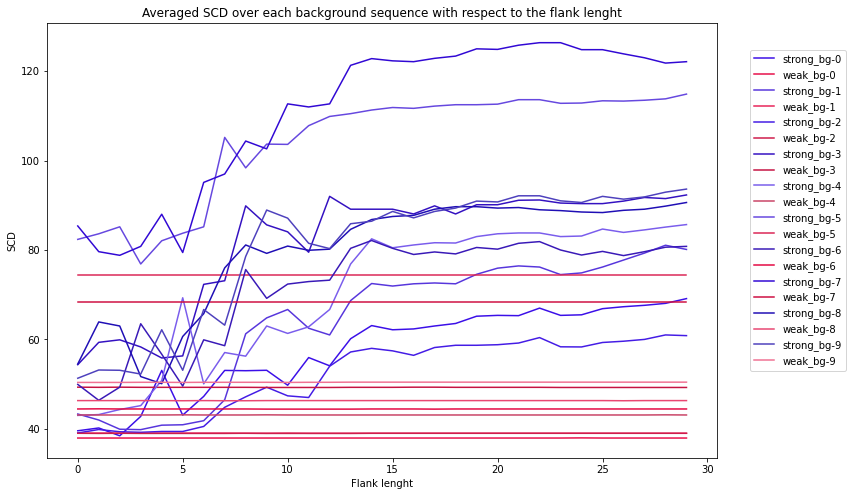

In [18]:
plt.figure(figsize=(12,8))
x = [x for x in range(30)]
for b in range(10):
    plt.plot(x, SCD_strong_fl_bg[b], label=f"strong_bg-{b}", c=strong_colors_10[b])
    plt.plot(x, SCD_weak_fl_bg[b], label=f"weak_bg-{b}", c=weak_colors_10[b])
plt.legend(loc="upper right")
plt.title("Averaged SCD over each background sequence with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("SCD")
# plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.2, 0.95), loc='upper right', ncol=1)

### Comment: 
Tendecies are consistent among background sequences. Sequences flanking the CTCF-bingding motif doesn't have impact on SCD (and TAD boundary's strenght) if a CTCF is a weak motif, while adding flank of 15-20 bp around motif makes a motif stronger.

In [19]:
SCD_strong_fl_target = [[] for i in range(6)]
SCD_weak_fl_target = [[] for i in range(6)]

for l in range(30):
    for t in range(6):
        SCD_strong_fl_target[t].append(df[(df.strong == True) & (df.flank_bp == l)][f"SCD_h1_m1_t{t}"].mean())
        SCD_weak_fl_target[t].append(df[(df.strong == False) & (df.flank_bp == l)][f"SCD_h1_m1_t{t}"].mean())

In [20]:
strong_targets = ["#F20808", "#1119EF", "#09DAE9", "#13F238", "#EC9018", "#E80ACA"]
weak_targets = ["#E65A5A", "#7B7EDB", "#AAEAEF", "#98F0A7", "#EEBE80", "#E69FDD"]

# A color of one target is same, but darker for strong, and paler for weak motifs.

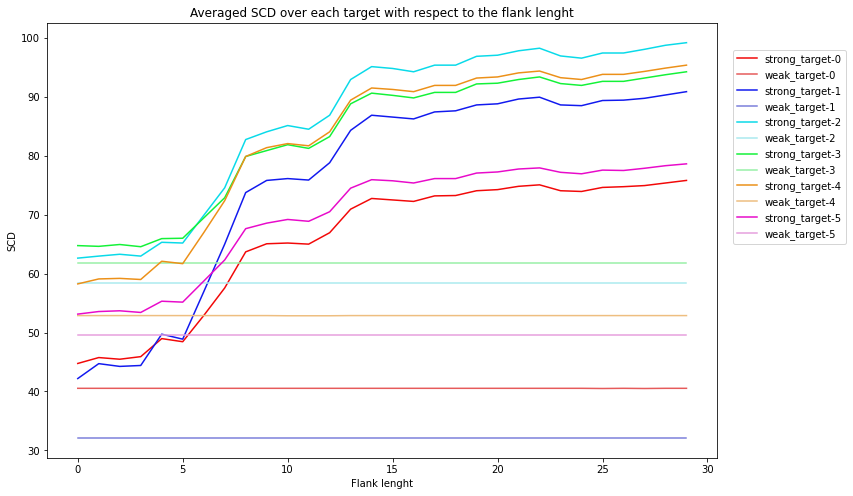

In [21]:
plt.figure(figsize=(12,8))
x = [x for x in range(30)]

for t in range(6):
    plt.plot(x, SCD_strong_fl_target[t], label=f"strong_target-{t}", c=strong_targets[t])
    plt.plot(x, SCD_weak_fl_target[t], label=f"weak_target-{t}", c=weak_targets[t])

plt.legend(loc="upper right")
plt.title("Averaged SCD over each target with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("SCD")
# plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.2, 0.95), loc='upper right', ncol=1)

### Comment:
Tendecies are consistent between targets!

In [22]:
get_seq_index = lambda x : (x % 20)
df["seq_index"] = df["experiment_id"].apply(get_seq_index)

In [23]:
# 20 sequences = 10 first are strong, 10 next are weak

SCD_strong_fl_seqs = [[] for i in range(10)]
SCD_weak_fl_seqs = [[] for i in range(10)]

for l in range(30):
    for s in range(20):
        if s <= 9:
            SCD_strong_fl_seqs[s].append(df[(df.strong == True) & (df.flank_bp == l) & (df.seq_index == s)]["SCD_average"].mean())
        else:
            ind = s % 10
            SCD_weak_fl_seqs[ind].append(df[(df.strong == False) & (df.flank_bp == l) & (df.seq_index == s)][f"SCD_average"].mean())


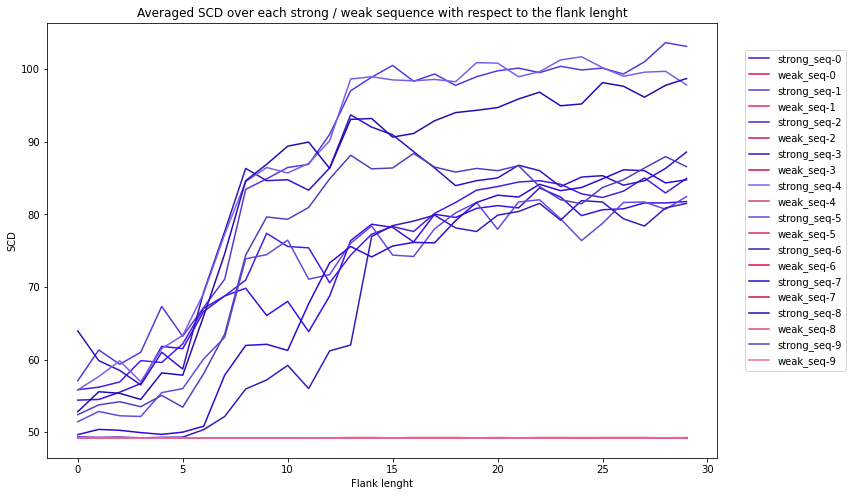

In [24]:
plt.figure(figsize=(12,8))

x = [x for x in range(30)]

for s in range(10):
    plt.plot(x, SCD_strong_fl_seqs[s], label=f"strong_seq-{s}", c=strong_colors_10[s])
    plt.plot(x, SCD_weak_fl_seqs[s], label=f"weak_seq-{s}", c=weak_colors_10[s])
    
plt.legend(loc="upper right")
plt.title("Averaged SCD over each strong / weak sequence with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("SCD")
# plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.2, 0.95), loc='upper right', ncol=1)

### INS-16

In [25]:
INS16_strong_fl = []
INS16_weak_fl = []

for l in range(30):
    INS16_strong_fl.append(df[(df.strong == True) & (df.flank_bp == l)]["INS-16_average"].mean())
    INS16_weak_fl.append(df[(df.strong == False) & (df.flank_bp == l)]["INS-16_average"].mean())

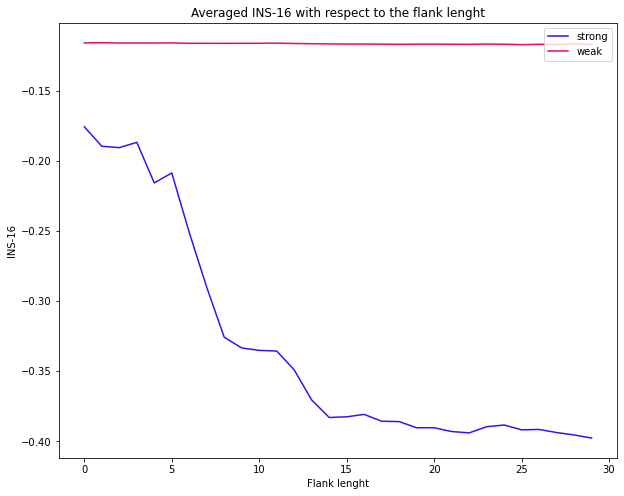

In [26]:
plt.figure(figsize=(10,8))
x = [x for x in range(30)]
plt.plot(x, INS16_strong_fl, label="strong", c=colors_2[0])
plt.plot(x, INS16_weak_fl, label="weak", c=colors_2[1])
plt.title("Averaged INS-16 with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("INS-16")
plt.legend(loc="upper right")

In [27]:
INS16_strong_fl_bg = [[] for i in range(10)]
INS16_weak_fl_bg = [[] for i in range(10)]

for l in range(30):
    for b in range(10):
        INS16_strong_fl_bg[b].append(df[(df.strong == True) & (df.flank_bp == l) & (df.background_index == b)]["INS-16_average"].mean())
        INS16_weak_fl_bg[b].append(df[(df.strong == False) & (df.flank_bp == l) & (df.background_index == b)]["INS-16_average"].mean())

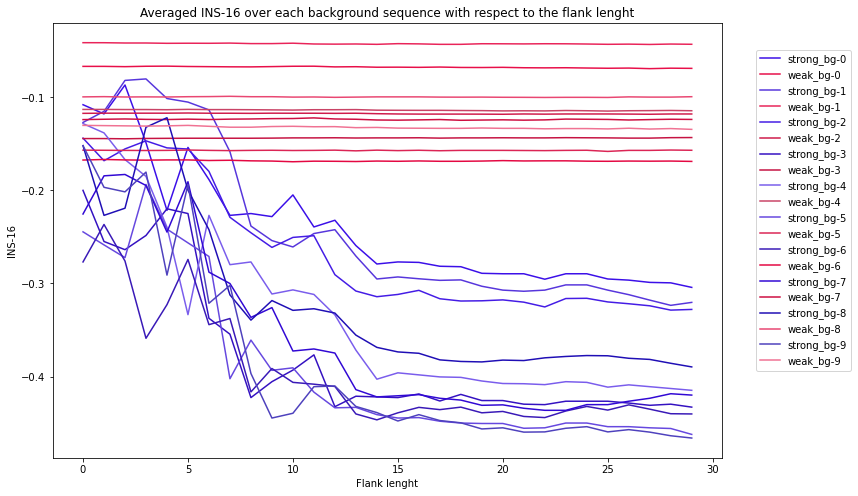

In [28]:
plt.figure(figsize=(12,8))
x = [x for x in range(30)]
for b in range(10):
    plt.plot(x, INS16_strong_fl_bg[b], label=f"strong_bg-{b}", c=strong_colors_10[b])
    plt.plot(x, INS16_weak_fl_bg[b], label=f"weak_bg-{b}", c=weak_colors_10[b])
plt.legend(loc="upper right")
plt.title("Averaged INS-16 over each background sequence with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("INS-16")
# plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.2, 0.95), loc='upper right', ncol=1)

### Comment:
Insulation drops for strong sequences inserted with 15-20bp flanks and doesn't change with flank lenght when a motif is weak.

In [29]:
df.columns

Index(['INS-16_h1_m1_t0', 'INS-16_h1_m1_t1', 'INS-16_h1_m1_t2',
       'INS-16_h1_m1_t3', 'INS-16_h1_m1_t4', 'INS-16_h1_m1_t5', 'SCD_h1_m1_t0',
       'SCD_h1_m1_t1', 'SCD_h1_m1_t2', 'SCD_h1_m1_t3', 'SCD_h1_m1_t4',
       'SCD_h1_m1_t5', 'background_index', 'chrom', 'end', 'experiment_id',
       'flank_bp', 'genomic_SCD', 'orientation', 'spacer_bp', 'start',
       'strand', 'strong', 'SCD_average', 'INS-16_average', 'seq_index'],
      dtype='object')

In [30]:
INS16_strong_fl_target = [[] for i in range(6)]
INS16_weak_fl_target = [[] for i in range(6)]

for l in range(30):
    for t in range(6):
        INS16_strong_fl_target[t].append(df[(df.strong == True) & (df.flank_bp == l)][f"INS-16_h1_m1_t{t}"].mean())
        INS16_weak_fl_target[t].append(df[(df.strong == False) & (df.flank_bp == l)][f"INS-16_h1_m1_t{t}"].mean())

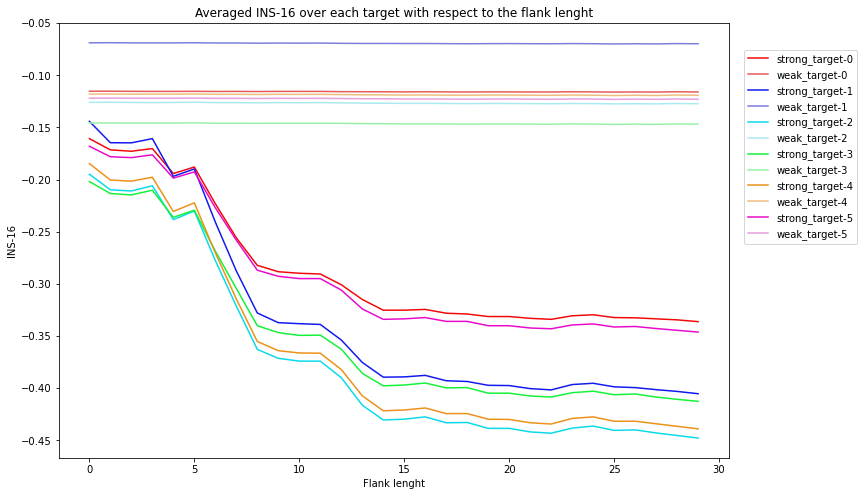

In [31]:
plt.figure(figsize=(12,8))
x = [x for x in range(30)]

for t in range(6):
    plt.plot(x, INS16_strong_fl_target[t], label=f"strong_target-{t}", c=strong_targets[t])
    plt.plot(x, INS16_weak_fl_target[t], label=f"weak_target-{t}", c=weak_targets[t])

plt.legend(loc="upper right")
plt.title("Averaged INS-16 over each target with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("INS-16")
# plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.2, 0.95), loc='upper right', ncol=1)

### Comment:
Again, strong consistency between targets.

In [32]:
INS16_strong_fl_seqs = [[] for i in range(10)]
INS16_weak_fl_seqs = [[] for i in range(10)]

for l in range(30):
    for s in range(20):
        if s <= 9:
            INS16_strong_fl_seqs[s].append(df[(df.strong == True) & (df.flank_bp == l) & (df.seq_index == s)]["INS-16_average"].mean())
        else:
            ind = s % 10
            INS16_weak_fl_seqs[ind].append(df[(df.strong == False) & (df.flank_bp == l) & (df.seq_index == s)][f"INS-16_average"].mean())

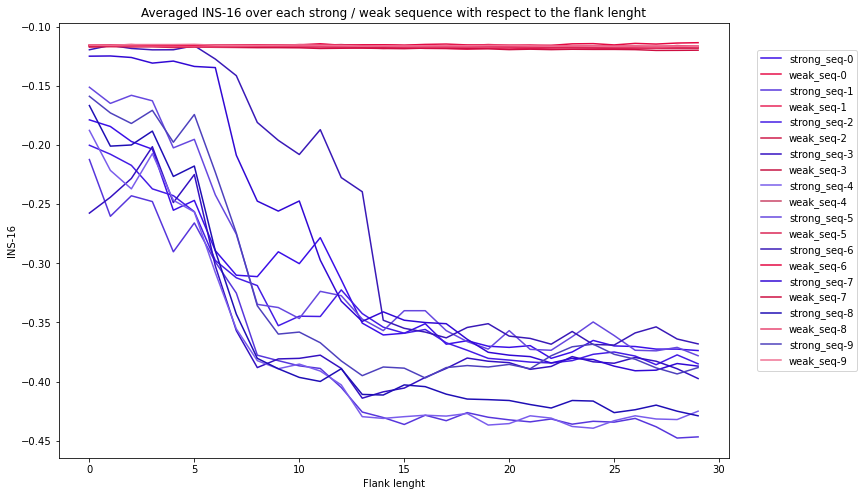

In [33]:
plt.figure(figsize=(12,8))

x = [x for x in range(30)]

for s in range(10):
    plt.plot(x, INS16_strong_fl_seqs[s], label=f"strong_seq-{s}", c=strong_colors_10[s])
    plt.plot(x, INS16_weak_fl_seqs[s], label=f"weak_seq-{s}", c=weak_colors_10[s])
    
plt.legend(loc="upper right")
plt.title("Averaged INS-16 over each strong / weak sequence with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("INS-16")
# plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.2, 0.95), loc='upper right', ncol=1)

### Comment:
15bp flanks around seems to play a major role in the change of insulation score.